### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)
  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()
# school_data_complete.dtypes


Student ID       student_name gender grade        school_name  \
0           0       Paul Bradley      M   9th  Huang High School   
1           1       Victor Smith      M  12th  Huang High School   
2           2    Kevin Rodriguez      M  12th  Huang High School   
3           3  Dr. Richard Scott      M  12th  Huang High School   
4           4         Bonnie Ray      F   9th  Huang High School   

   reading_score  math_score  School ID      type  size   budget  
0             66          79          0  District  2917  1910635  
1             94          61          0  District  2917  1910635  
2             90          60          0  District  2917  1910635  
3             67          58          0  District  2917  1910635  
4             97          84          0  District  2917  1910635

In [165]:
school_df = school_data_complete.loc[:, ["school_name", "type", "size", "budget", "math_score", "reading_score"]]
math_score_file = school_df.loc[school_df["math_score"] >=70]
math_score_count = math_score_file.count()["size"]
reading_score_file = school_df.loc[school_df["reading_score"] >=70]
reading_score_count = reading_score_file.count()["size"]
school_name_group = school_df.groupby(['school_name'])
filtered_school_name_group = school_name_group.mean()
overall_pass = school_df.loc[(school_df["math_score"] >= 70) & (
        school_df["reading_score"] >= 70), :]

total_school_count = len(school_df["school_name"].unique())
total_studentid_count = school_df["size"].count()
total_budget = filtered_school_name_group['budget'].sum()
average_math_score = school_df["math_score"].mean()
average_reading_score = school_df["reading_score"].mean()

percent_passing_math = (math_score_count/total_studentid_count)*100
percent_passing_reading = (reading_score_count/total_studentid_count)*100
percent_overall_pass = (overall_pass["math_score"].count()/total_studentid_count)*100

district_summary_df = pd.DataFrame({"Total Schools": [total_school_count], "Total Students": [total_studentid_count], "Total Budget": [total_budget], "Average Math Score": [average_math_score], "Average Reading Score": [average_reading_score], "% Passing Math": [percent_passing_math], "% Passing Reading": [percent_passing_reading], "% Over all Passing": [percent_overall_pass]})

district_summary_df["Total Budget"] = district_summary_df["Total Budget"].astype(float).map("${:,.2f}".format)
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].astype(float).map("{:,.2f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].astype(float).map("{:,.2f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Over all Passing"] = district_summary_df["% Over all Passing"].astype(float).map("{:,.2f} %".format)
district_summary_df

Total Schools  Total Students    Total Budget Average Math Score  \
0             15           39170  $24,649,428.00              78.99   

  Average Reading Score % Passing Math % Passing Reading % Over all Passing  
0                 81.88        74.98 %           85.81 %            65.17 %

In [166]:
school_summary_df = school_df.rename(columns = {"grade": "Grade", "school_name": "School Name", "type": "School Type", "size": "Total Students", "budget": "Total School Budget", "math_score": "Average Math Score", "reading_score": "Average Reading Score"})

school_math_score = school_summary_df.loc[school_summary_df["Average Math Score"] >=70]
school_math_filter = school_math_score.groupby(["School Name"]).count()["Average Math Score"]

school_reading_score = school_summary_df.loc[school_summary_df["Average Reading Score"] >=70]
school_reading_filter = school_reading_score.groupby(["School Name"]).count()["Average Reading Score"]

school_overall_pass = school_summary_df.loc[(school_summary_df["Average Math Score"] >= 70) & (school_summary_df["Average Reading Score"] >= 70), :]          
overall_pass_filter = school_overall_pass.groupby(['School Name']).count()["Average Math Score"]

school_summary_df = school_summary_df.groupby(["School Name", "School Type"]).mean() 
school_summary_df["Per Student Budget"] = school_summary_df["Total School Budget"] / school_summary_df["Total Students"]
school_summary_df["% Passing Math"] = (school_math_filter / school_summary_df["Total Students"])*100
school_summary_df["% Passing Reading"] = (school_reading_filter / school_summary_df["Total Students"])*100
school_summary_df["% Overall Passing"] = (overall_pass_filter / school_summary_df["Total Students"])*100
school_summary_df = school_summary_df.reset_index()
copy_school_summary_df = school_summary_df.copy()  # for use later without format.

school_summary_df["Total School Budget"] = school_summary_df["Total School Budget"].map("${:,.2f}".format)
school_summary_df["Per Student Budget"] = school_summary_df["Per Student Budget"].map("${:,.2f}".format)
school_summary_df["Average Math Score"] = school_summary_df["Average Math Score"].map("{:,.2f}".format)
school_summary_df["Average Reading Score"] = school_summary_df["Average Reading Score"].map("{:,.2f}".format)
school_summary_df["% Passing Math"] = school_summary_df["% Passing Math"].map("{:,.2f} %".format)
school_summary_df["% Passing Reading"] = school_summary_df["% Passing Reading"].map("{:,.2f} %".format)
school_summary_df["% Overall Passing"] = school_summary_df["% Overall Passing"].map("{:,.2f} %".format)
school_summary_df

School Name School Type  Total Students Total School Budget  \
0      Bailey High School    District          4976.0       $3,124,928.00   
1     Cabrera High School     Charter          1858.0       $1,081,356.00   
2    Figueroa High School    District          2949.0       $1,884,411.00   
3        Ford High School    District          2739.0       $1,763,916.00   
4     Griffin High School     Charter          1468.0         $917,500.00   
5   Hernandez High School    District          4635.0       $3,022,020.00   
6      Holden High School     Charter           427.0         $248,087.00   
7       Huang High School    District          2917.0       $1,910,635.00   
8     Johnson High School    District          4761.0       $3,094,650.00   
9        Pena High School     Charter           962.0         $585,858.00   
10  Rodriguez High School    District          3999.0       $2,547,363.00   
11    Shelton High School     Charter          1761.0       $1,056,600.00   
12     Thomas High School     Charter          1635.0       $1,043,130.00   
13     Wilson High School     Charter          2283.0       $1,319,574.00   
14     Wright High School     Charter          1800.0       $1,049,400.00   

   Average Math Score Average Reading Score Per Student Budget % Passing Math  \
0               77.05                 81.03            $628.00        66.68 %   
1               83.06                 83.98            $582.00        94.13 %   
2               76.71                 81.16            $639.00        65.99 %   
3               77.10                 80.75            $644.00        68.31 %   
4               83.35                 83.82            $625.00        93.39 %   
5               77.29                 80.93            $652.00        66.75 %   
6               83.80                 83.81            $581.00        92.51 %   
7               76.63                 81.18            $655.00        65.68 %   
8               77.07                 80.97            $650.00        66.06 %   
9               83.84                 84.04            $609.00        94.59 %   
10              76.84                 80.74            $637.00        66.37 %   
11              83.36                 83.73            $600.00        93.87 %   
12              83.42                 83.85            $638.00        93.27 %   
13              83.27                 83.99            $578.00        93.87 %   
14              83.68                 83.95            $583.00        93.33 %   

   % Passing Reading % Overall Passing  
0            81.93 %           54.64 %  
1            97.04 %           91.33 %  
2            80.74 %           53.20 %  
3            79.30 %           54.29 %  
4            97.14 %           90.60 %  
5            80.86 %           53.53 %  
6            96.25 %           89.23 %  
7            81.32 %           53.51 %  
8            81.22 %           53.54 %  
9            95.95 %           90.54 %  
10           80.22 %           52.99 %  
11           95.85 %           89.89 %  
12           97.31 %           90.95 %  
13           96.54 %           90.58 %  
14           96.61 %           90.33 %

In [167]:
top_performing_schools = school_summary_df.sort_values("% Overall Passing", ascending=False)
top_performing_schools.head()

School Name School Type  Total Students Total School Budget  \
1   Cabrera High School     Charter          1858.0       $1,081,356.00   
12   Thomas High School     Charter          1635.0       $1,043,130.00   
4   Griffin High School     Charter          1468.0         $917,500.00   
13   Wilson High School     Charter          2283.0       $1,319,574.00   
9      Pena High School     Charter           962.0         $585,858.00   

   Average Math Score Average Reading Score Per Student Budget % Passing Math  \
1               83.06                 83.98            $582.00        94.13 %   
12              83.42                 83.85            $638.00        93.27 %   
4               83.35                 83.82            $625.00        93.39 %   
13              83.27                 83.99            $578.00        93.87 %   
9               83.84                 84.04            $609.00        94.59 %   

   % Passing Reading % Overall Passing  
1            97.04 %           91.33 %  
12           97.31 %           90.95 %  
4            97.14 %           90.60 %  
13           96.54 %           90.58 %  
9            95.95 %           90.54 %

In [168]:
bottom_performing_schools = school_summary_df.sort_values("% Overall Passing")
bottom_performing_schools.head()

School Name School Type  Total Students Total School Budget  \
10  Rodriguez High School    District          3999.0       $2,547,363.00   
2    Figueroa High School    District          2949.0       $1,884,411.00   
7       Huang High School    District          2917.0       $1,910,635.00   
5   Hernandez High School    District          4635.0       $3,022,020.00   
8     Johnson High School    District          4761.0       $3,094,650.00   

   Average Math Score Average Reading Score Per Student Budget % Passing Math  \
10              76.84                 80.74            $637.00        66.37 %   
2               76.71                 81.16            $639.00        65.99 %   
7               76.63                 81.18            $655.00        65.68 %   
5               77.29                 80.93            $652.00        66.75 %   
8               77.07                 80.97            $650.00        66.06 %   

   % Passing Reading % Overall Passing  
10           80.22 %           52.99 %  
2            80.74 %           53.20 %  
7            81.32 %           53.51 %  
5            80.86 %           53.53 %  
8            81.22 %           53.54 %

In [169]:
columns = ["school_name", "grade", "math_score"]
ninth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "9th", columns]
ninth_grade_filter = ninth_grade_math_score.groupby(["school_name"])
ninth_grade_series = ninth_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
tenth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "10th", columns]
tenth_grade_filter = tenth_grade_math_score.groupby(["school_name"])
tenth_grade_series = tenth_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
eleventh_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "11th", columns]
eleventh_grade_filter = eleventh_grade_math_score.groupby(["school_name"])
eleventh_grade_series = eleventh_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
twelfth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "12th", columns]
twelfth_grade_filter = twelfth_grade_math_score.groupby(["school_name"])
twelfth_grade_series = twelfth_grade_filter.mean()

first_df = pd.merge(ninth_grade_series, tenth_grade_series, how = "left", on = ["school_name"])
second_df = pd.merge(eleventh_grade_series, twelfth_grade_series, how = "left", on = ["school_name"])
average_math_score = pd.merge(first_df, second_df, how = "left", on = ["school_name"])
average_math_score = average_math_score.rename(columns = {"math_score_x_x": "9th", "math_score_y_x": "10th", "math_score_x_y": "11th", "math_score_y_y": "12th"})
average_math_score = average_math_score.rename(index = {"school_name": "School Name"})

average_math_score["9th"] = average_math_score["9th"].astype(float).map("{:,.2f}".format)
average_math_score["10th"] = average_math_score["10th"].astype(float).map("{:,.2f}".format)
average_math_score["11th"] = average_math_score["11th"].astype(float).map("{:,.2f}".format)
average_math_score["12th"] = average_math_score["12th"].astype(float).map("{:,.2f}".format)
average_math_score = average_math_score.reset_index()
average_math_score

school_name    9th   10th   11th   12th
0      Bailey High School  77.08  77.00  77.52  76.49
1     Cabrera High School  83.09  83.15  82.77  83.28
2    Figueroa High School  76.40  76.54  76.88  77.15
3        Ford High School  77.36  77.67  76.92  76.18
4     Griffin High School  82.04  84.23  83.84  83.36
5   Hernandez High School  77.44  77.34  77.14  77.19
6      Holden High School  83.79  83.43  85.00  82.86
7       Huang High School  77.03  75.91  76.45  77.23
8     Johnson High School  77.19  76.69  77.49  76.86
9        Pena High School  83.63  83.37  84.33  84.12
10  Rodriguez High School  76.86  76.61  76.40  77.69
11    Shelton High School  83.42  82.92  83.38  83.78
12     Thomas High School  83.59  83.09  83.50  83.50
13     Wilson High School  83.09  83.72  83.20  83.04
14     Wright High School  83.26  84.01  83.84  83.64

In [170]:
columns = ["school_name", "grade", "reading_score"]
ninth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "9th", columns]
ninth_grade_filter = ninth_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
tenth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "10th", columns]
tenth_grade_filter = tenth_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
eleventh_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "11th", columns]
eleventh_grade_filter = eleventh_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
twelfth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "12th", columns]
twelfth_grade_filter = twelfth_grade_reading_score.groupby(["school_name"]).mean()

first_df = pd.merge(ninth_grade_filter, tenth_grade_filter, how = "left", on = ["school_name"])
second_df = pd.merge(eleventh_grade_filter, twelfth_grade_filter, how = "left", on = ["school_name"])
average_reading_score = pd.merge(first_df, second_df, how = "left", on = ["school_name"])
average_reading_score = average_reading_score.rename(columns = {"reading_score_x_x": "9th", "reading_score_y_x": "10th", "reading_score_x_y": "11th", "reading_score_y_y": "12th"})

average_reading_score["9th"] = average_reading_score["9th"].astype(float).map("{:,.2f}".format)
average_reading_score["10th"] = average_reading_score["10th"].astype(float).map("{:,.2f}".format)
average_reading_score["11th"] = average_reading_score["11th"].astype(float).map("{:,.2f}".format)
average_reading_score["12th"] = average_reading_score["12th"].astype(float).map("{:,.2f}".format)
average_reading_score = average_reading_score.reset_index()
average_reading_score

school_name    9th   10th   11th   12th
0      Bailey High School  81.30  80.91  80.95  80.91
1     Cabrera High School  83.68  84.25  83.79  84.29
2    Figueroa High School  81.20  81.41  80.64  81.38
3        Ford High School  80.63  81.26  80.40  80.66
4     Griffin High School  83.37  83.71  84.29  84.01
5   Hernandez High School  80.87  80.66  81.40  80.86
6      Holden High School  83.68  83.32  83.82  84.70
7       Huang High School  81.29  81.51  81.42  80.31
8     Johnson High School  81.26  80.77  80.62  81.23
9        Pena High School  83.81  83.61  84.34  84.59
10  Rodriguez High School  80.99  80.63  80.86  80.38
11    Shelton High School  84.12  83.44  84.37  82.78
12     Thomas High School  83.73  84.25  83.59  83.83
13     Wilson High School  83.94  84.02  83.76  84.32
14     Wright High School  83.83  83.81  84.16  84.07

In [171]:
bins = [0, 584, 629, 644, 675]
group_labels = ["<584", "585-629", "630-644", "645-675"]

spending_per_student = copy_school_summary_df[['Average Math Score', 'Average Reading Score','Per Student Budget', '% Passing Math', '% Passing Reading', '% Overall Passing']]
spending_per_student["Spending Ranges (Per Student)"] = pd.cut(spending_per_student["Per Student Budget"], bins, labels=group_labels)
spending_per_student = spending_per_student.groupby("Spending Ranges (Per Student)").mean()
spending_per_student = spending_per_student[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
copy_spending_per_student = spending_per_student.copy()

spending_per_student["Average Math Score"] = spending_per_student["Average Math Score"].map("{:,.2f}".format)
spending_per_student["Average Reading Score"] = spending_per_student["Average Reading Score"].map("{:,.2f}".format)
spending_per_student["% Passing Math"] = spending_per_student["% Passing Math"].map("{:,.2f} %".format)
spending_per_student["% Passing Reading"] = spending_per_student["% Passing Reading"].map("{:,.2f} %".format)
spending_per_student["% Overall Passing"] = spending_per_student["% Overall Passing"].map("{:,.2f} %".format)
spending_per_student = spending_per_student.reset_index()
spending_per_student

Spending Ranges (Per Student) Average Math Score Average Reading Score  \
0                          <584              83.46                 83.93   
1                       585-629              81.90                 83.16   
2                       630-644              78.52                 81.62   
3                       645-675              77.00                 81.03   

  % Passing Math % Passing Reading % Overall Passing  
0        93.46 %           96.61 %           90.37 %  
1        87.13 %           92.72 %           81.42 %  
2        73.48 %           84.39 %           62.86 %  
3        66.16 %           81.13 %           53.53 %

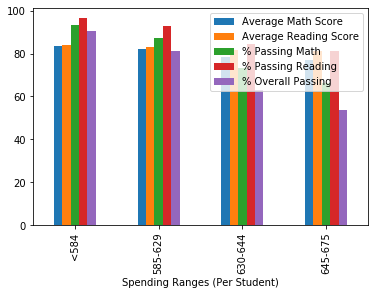

In [172]:
copy_spending_per_student.plot.bar()


In [173]:
bins = [0, 1000, 2000, 5000]
group_labels = ["Small <1000", "Medium 1000-2000", "Large 2000-5000"]

school_size_df = copy_school_summary_df[['Total Students', 'Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
school_size_df["School Size"] = pd.cut(school_size_df["Total Students"], bins, labels=group_labels)
school_size_df = school_size_df.groupby("School Size").mean()
school_size_df = school_size_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
copy_school_size_df = school_size_df.copy()

school_size_df["Average Math Score"] = school_size_df["Average Math Score"].map("{:,.2f}".format)
school_size_df["Average Reading Score"] = school_size_df["Average Reading Score"].map("{:,.2f}".format)
school_size_df["% Passing Math"] = school_size_df["% Passing Math"].map("{:,.2f} %".format)
school_size_df["% Passing Reading"] = school_size_df["% Passing Reading"].map("{:,.2f} %".format)
school_size_df["% Overall Passing"] = school_size_df["% Overall Passing"].map("{:,.2f} %".format)
school_size_df = school_size_df.reset_index()
school_size_df

School Size Average Math Score Average Reading Score % Passing Math  \
0       Small <1000              83.82                 83.93        93.55 %   
1  Medium 1000-2000              83.37                 83.86        93.60 %   
2   Large 2000-5000              77.75                 81.34        69.96 %   

  % Passing Reading % Overall Passing  
0           96.10 %           89.88 %  
1           96.79 %           90.62 %  
2           82.77 %           58.29 %

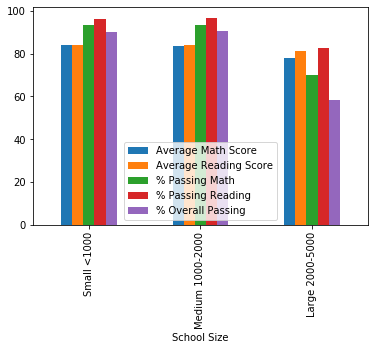

In [174]:
copy_school_size_df.plot(kind='bar')

In [175]:
bins = [0, 2000, 5000]
group_labels = ["Charter", "District"]

school_type_df = copy_school_summary_df[['Total Students', 'Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
school_type_df["School Type"] = pd.cut(school_type_df["Total Students"], bins, labels=group_labels)
school_type_df = school_type_df.groupby("School Type").mean()
school_type_df = school_type_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
copy_school_type_df = school_type_df.copy()

school_type_df["Average Math Score"] = school_type_df["Average Math Score"].map("{:,.2f}".format)
school_type_df["Average Reading Score"] = school_type_df["Average Reading Score"].map("{:,.2f}".format)
school_type_df["% Passing Math"] = school_type_df["% Passing Math"].map("{:,.2f} %".format)
school_type_df["% Passing Reading"] = school_type_df["% Passing Reading"].map("{:,.2f} %".format)
school_type_df["% Overall Passing"] = school_type_df["% Overall Passing"].map("{:,.2f} %".format)
school_type_df = school_type_df.reset_index()
school_type_df


School Type Average Math Score Average Reading Score % Passing Math  \
0     Charter              83.50                 83.88        93.59 %   
1    District              77.75                 81.34        69.96 %   

  % Passing Reading % Overall Passing  
0           96.59 %           90.41 %  
1           82.77 %           58.29 %

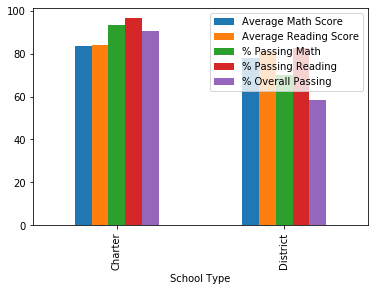

In [176]:
copy_school_type_df.plot(kind='bar')

Looking at the the plots above. Spending more money per-student did not improve grades at all. The number of students is what matter 'schools with more than 2000 students have the lowest grades'. Small class size means better grades and that is why Charter schools grade-average way better than District or public schools, this is very clear when we look at top five performing schools"all Charters" vs bottom five ones"all District". Also, Charter schools kids out perform their District counterpart by 37% when it comes to the overall percentage of passing both math and reading.